# Séries temporais - ARIMA

In [4]:
#Instalação
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
#Para processar datas
import datetime
#Biblioteca de estatística com análise de séries temporais tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [6]:
#Carregamento da base de dados - não esqueça de importar, fazendo o upload no diretório
#Converter a data que existe no csv no formato de data usando a função lambda para criar uma função em tempo de execução
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
#Faz o download e depois o carregamento com upload
dataset = pd.read_csv('acoesS.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'BOVA11.SA'])
#Buscando somente data e BOVA11

In [7]:
dataset
#Data em negrito, pq definimos como índice

,BOVA11.SA
Date,
2019-01-02,87.900002
2019-01-03,88.000000
2019-01-04,88.500000
2019-01-07,88.480003
2019-01-08,88.830002
...,...
2023-04-18,102.699997
2023-04-19,100.480003
2023-04-20,101.000000


In [8]:
#Verificar se existem valores nulos
dataset.isnull().sum()

BOVA11.SA    13
dtype: int64

In [9]:
#Caso tenha valores nulos, execute o seguinte comando. Para eliminar possibilidade de erros
dataset.dropna(inplace=True)

In [10]:
#Verificar se existem valores nulos
dataset.isnull().sum()

BOVA11.SA    0
dtype: int64

In [11]:
dataset

,BOVA11.SA
Date,
2019-01-02,87.900002
2019-01-03,88.000000
2019-01-04,88.500000
2019-01-07,88.480003
2019-01-08,88.830002
...,...
2023-04-18,102.699997
2023-04-19,100.480003
2023-04-20,101.000000


In [12]:
time_series = dataset['BOVA11.SA']

In [13]:
#Mostra a data e os valores, pq definimos a data como índice
time_series

Date
2019-01-02     87.900002
2019-01-03     88.000000
2019-01-04     88.500000
2019-01-07     88.480003
2019-01-08     88.830002
                 ...    
2023-04-18    102.699997
2023-04-19    100.480003
2023-04-20    101.000000
2023-04-24    100.620003
2023-04-25     99.919998
Name: BOVA11.SA, Length: 1058, dtype: float64

## Exploração da série temporal

In [14]:
time_series[0]

87.9000015258789

In [15]:
#Valor em uma data específica
time_series['2019-01-02']

87.9000015258789

In [16]:
#Valor em uma data específica até outra
time_series['2019-01-02':'2019-01-10']

Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
2019-01-09    90.320000
2019-01-10    90.419998
Name: BOVA11.SA, dtype: float64

In [17]:
#Valor do início da base de dados até uma data específica
time_series[:'2019-07-31']

Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
                ...    
2019-07-25    98.800003
2019-07-26    99.150002
2019-07-29    99.559998
2019-07-30    99.120003
2019-07-31    97.980003
Name: BOVA11.SA, Length: 131, dtype: float64

In [18]:
#De um ano específico
time_series['2019']

Date
2019-01-02     87.900002
2019-01-03     88.000000
2019-01-04     88.500000
2019-01-07     88.480003
2019-01-08     88.830002
                 ...    
2019-12-20    110.839996
2019-12-23    111.669998
2019-12-26    112.809998
2019-12-27    112.169998
2019-12-30    111.230003
Name: BOVA11.SA, Length: 235, dtype: float64

In [19]:
#última data
time_series.index.max()

Timestamp('2023-04-25 00:00:00')

In [20]:
#primeira data
time_series.index.min()

Timestamp('2019-01-02 00:00:00')

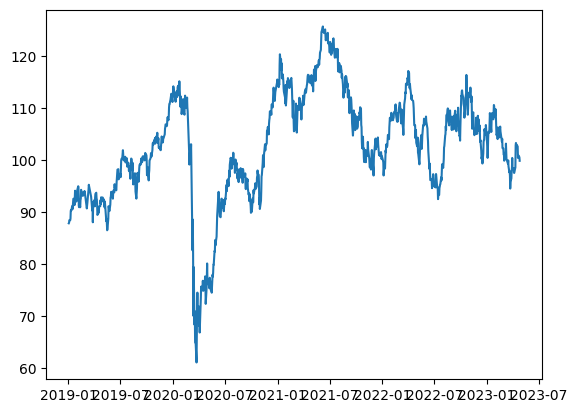

In [21]:
#gráfico com todas as datas
plt.plot(time_series);

In [22]:
#gráfico dinâmico com todas as datas
figura = px.line(title='Histórico do preço das ações')
#.index para acessar as datas
figura.add_scatter(x = time_series.index, y = time_series)

In [23]:
#Subdataframes para intervalos específicos para análise de um ano específico
time_series_datas = time_series['2019-01-02':'2019-12-30']

In [24]:
time_series_datas

Date
2019-01-02     87.900002
2019-01-03     88.000000
2019-01-04     88.500000
2019-01-07     88.480003
2019-01-08     88.830002
                 ...    
2019-12-20    110.839996
2019-12-23    111.669998
2019-12-26    112.809998
2019-12-27    112.169998
2019-12-30    111.230003
Name: BOVA11.SA, Length: 235, dtype: float64

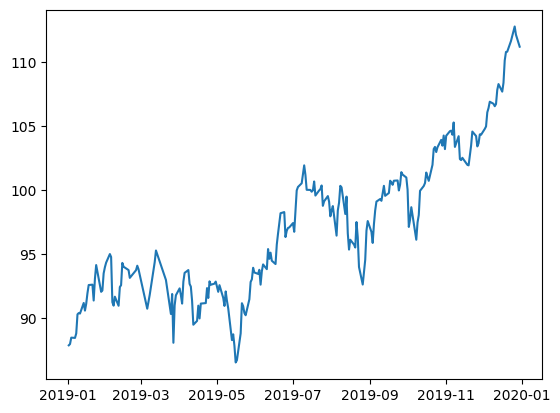

In [25]:
#Gráfico simples com o intervalo acima
plt.plot(time_series_datas);

## Decomposição da série temporal

In [26]:
#primeiro verificamos se é do tipo pandas a variável
type(time_series)

pandas.core.series.Series

In [27]:
#Quantidade de registros dividido por 2
len(time_series) / 2

529.0

In [28]:
#duas vezes // para não pegar a parte decimal depois da ,
#colocamos o len / 2 porque o algoritmo precisa passar pela base de dados 2 vezes
decomposicao = seasonal_decompose(time_series, period = len(time_series) // 2)

In [29]:
#a série temporal tem 3 elementos principais
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal #efeito sazonal
aleatorio = decomposicao.resid

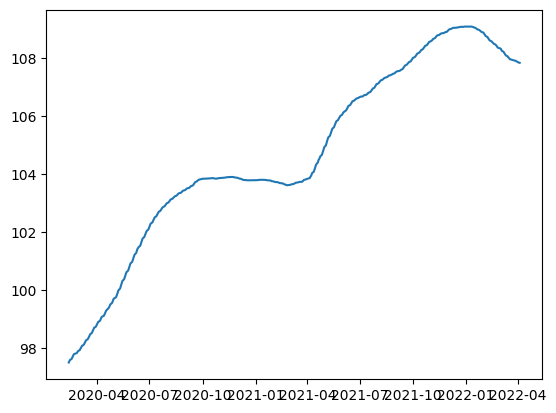

In [30]:
plt.plot(tendencia);

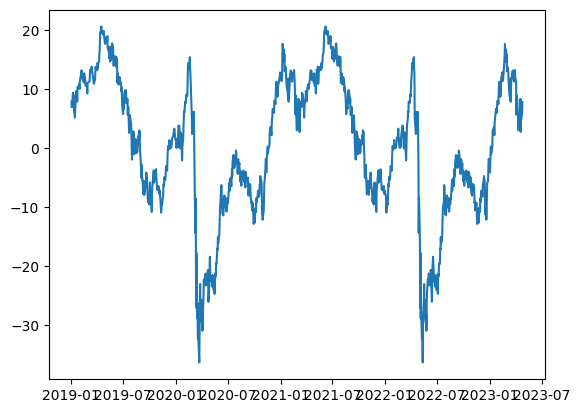

In [31]:
plt.plot(sazonal);
#mais interessante para gráfico de vendas, por exemplo, o comportamento de venda de produtos no natal
#empresa área = as ações podem subir em um feriado

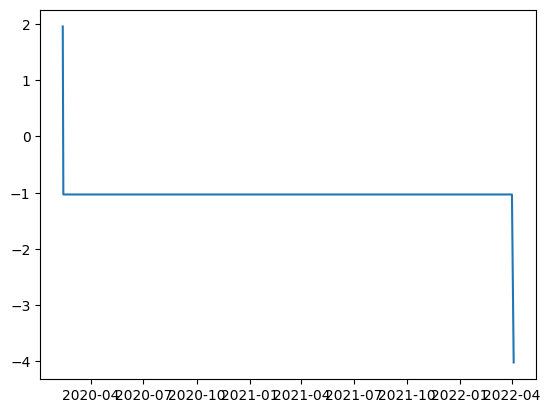

In [32]:
plt.plot(aleatorio);
#os dados que não podem ser explicados, o que não é tendência e não tem sazonalidade

## Previsões com ARIMA

In [33]:
#Os modelos ARIMA são úteis para prever valores futuros em séries temporais, 
#tais como preços de ações, previsão de demanda e previsão de vendas, entre outros.

In [34]:
#arima e autoarima são algoritmos. Porém o autoarima que vai fazer 
#os testes e descobrir os melhores parâmetros que irão se adaptar ao conjunto de dados
#Caso você tenha embasamento matemático e queira configurar todos os parâmetros manualmente, pode ser utilizado o arima
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')
#suppress_warnings=True para não mostrar warnings /  error_action='ignore'/ isso acontece porque ele vai encontrar os melhores parâmetros
#não influencia o modelo

In [35]:
# Parâmetros P, Q e D
#p=1º e não vamos discutir o que são estes parâmetros
modelo.order

(3, 1, 1)

In [36]:
#Vamos indicar o período que vamos requer as previsões do preço das ações para 90 dias
previsoes = modelo.predict(n_periods=90)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [37]:
#já geramos previsões, porém não temos datas futuras para maio, junho e julho de 2023.
#vamos criar uma sub-base de dados e comparar os dois 
previsoes

1058    100.102589
1059     99.950264
1060    100.028063
1061     99.979170
1062    100.008289
           ...    
1143     99.997098
1144     99.997098
1145     99.997098
1146     99.997098
1147     99.997098
Length: 90, dtype: float64

## Gráfico das previsões

In [38]:
#1058 preços de ações
len(time_series)

1058

In [39]:
#Vamos produzir um conjunto de treinamento somente com algumas datas, para 
#comparar o resultado do algoritmo com o resultado real
#de 0 até 715
treinamento = time_series[:716]
treinamento.shape

(716,)

In [40]:
#Pegamos o índice do menor e da maior data do conjunto de treinamento
treinamento.index.min(), treinamento.index.max()

(Timestamp('2019-01-02 00:00:00'), Timestamp('2021-12-09 00:00:00'))

In [41]:
#criar a base de dados
#vamos fazer o teste com quase um ano depois
teste = time_series[716:]
teste.shape

(342,)

In [42]:
#Pegamos o índice do menor e da maior data do conjunto de treinamento
teste.index.min(), teste.index.max()

(Timestamp('2021-12-10 00:00:00'), Timestamp('2023-04-25 00:00:00'))

In [43]:
#Produzimos um novo conjunto de treinamento com um novo modelo
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [44]:
teste.index

DatetimeIndex(['2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23',
               ...
               '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-24', '2023-04-25'],
              dtype='datetime64[ns]', name='Date', length=342, freq=None)

In [45]:
#Nosso modelo foi treinado até o 716 e depois temos mais 342 valores
previsoes = pd.DataFrame(modelo2.predict(n_periods=342).values, index=teste.index)
previsoes.columns = ['previsoes']
previsoes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,previsoes
Date,
2021-12-10,102.472629
2021-12-13,102.366860
2021-12-14,102.209799
2021-12-15,102.404799
2021-12-16,102.218117
...,...
2023-04-18,102.302078
2023-04-19,102.302078
2023-04-20,102.302078


In [46]:
#dados reais da base de dados
#compara a tabela de cima com a de baixo
teste

Date
2021-12-10    103.730003
2021-12-13    103.500000
2021-12-14    102.699997
2021-12-15    103.199997
2021-12-16    104.410004
                 ...    
2023-04-18    102.699997
2023-04-19    100.480003
2023-04-20    101.000000
2023-04-24    100.620003
2023-04-25     99.919998
Name: BOVA11.SA, Length: 342, dtype: float64

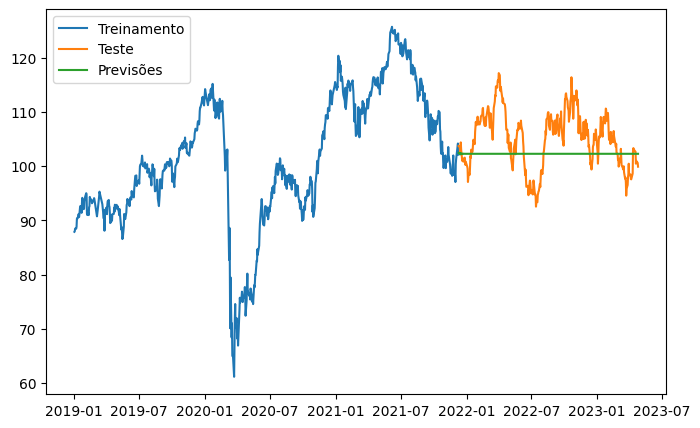

In [47]:
#gerar um gráfico com as previsões
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();
#Fatos externos comprometem

## Avaliação do ARIMA

In [48]:
#ARIMA comparando as duas bases de dados teste x previsões

In [49]:
#Valores reais
teste[0:2]

Date
2021-12-10    103.730003
2021-12-13    103.500000
Name: BOVA11.SA, dtype: float64

In [50]:
#Valores previstos
previsoes[0:2]

,previsoes
Date,
2021-12-10,102.472629
2021-12-13,102.366860


In [51]:
teste - previsoes['previsoes']

Date
2021-12-10    1.257374
2021-12-13    1.133140
2021-12-14    0.490198
2021-12-15    0.795198
2021-12-16    2.191887
                ...   
2023-04-18    0.397919
2023-04-19   -1.822074
2023-04-20   -1.302078
2023-04-24   -1.682075
2023-04-25   -2.382080
Length: 342, dtype: float64

In [52]:
#Valores precisar apenas do valor da diferença absoluta, no caso 1.24
2.59 / 365

0.007095890410958904

In [53]:
#abs extrair o valor sem considerar o sinal de -
#faz a soma de todos os valor e dividi pela quantidade de registros
#Em média o algoritmo errou 4,90 reias para cima ou para baixo
sum(abs(teste - previsoes['previsoes']) / len(teste))

4.905783629891045

In [54]:
#Função que executa os mesmos passos acima
from sklearn.metrics import mean_absolute_error

In [55]:
mean_absolute_error(teste, previsoes)

4.905783629891046

# Séries temporais - Facebook Prophet

In [56]:
#Também para fazer a previsão dos preços bovespa
#Instalação
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
#importação das bibliotecas para bases de dados muitos dados
from prophet import Prophet
import pandas as pd

In [58]:
#Carregamento da base de dados
#usecols usa apenas a data e o bova11
dataset = pd.read_csv('acoesS.csv', usecols=['Date', 'BOVA11.SA'])
dataset

,Date,BOVA11.SA
0,2019-01-02,87.900002
1,2019-01-03,88.000000
2,2019-01-04,88.500000
3,2019-01-07,88.480003
4,2019-01-08,88.830002
...,...,...
1066,2023-04-18,102.699997
1067,2023-04-19,100.480003
1068,2023-04-20,101.000000
1069,2023-04-24,100.620003


In [59]:
#recriamos o dataset para o formato de dicionário. A biblioteca exige
dataset = dataset[['Date', 'BOVA11.SA']].rename(columns = {'Date': 'ds', 'BOVA11.SA': 'y'})
dataset

,ds,y
0,2019-01-02,87.900002
1,2019-01-03,88.000000
2,2019-01-04,88.500000
3,2019-01-07,88.480003
4,2019-01-08,88.830002
...,...,...
1066,2023-04-18,102.699997
1067,2023-04-19,100.480003
1068,2023-04-20,101.000000
1069,2023-04-24,100.620003


## Construção do modelo e previsões

In [60]:
#criando o modelo
modelo = Prophet()
#fazendo o treinamento
modelo.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpafl7t_hv/ftzg50pw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpafl7t_hv/qemtyucc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69110', 'data', 'file=/tmp/tmpafl7t_hv/ftzg50pw.json', 'init=/tmp/tmpafl7t_hv/qemtyucc.json', 'output', 'file=/tmp/tmpafl7t_hv/prophet_modelxxrbg44m/prophet_model-20230428004854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [61]:
#gera um novo dataframe com previsões futuras, passando 90 dias para frente da base
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)

In [62]:
previsoes.head()
#gera um dataframe com várias colunas gerando previsões para todas as datas e também para as 90 datas anteriores
#Trend = valor de tendência
#yhat_lower = valor mínimo / yhat_upper = valor máximo / weekly = previsões semanalmente e yearly= anualmente
#yhat = previsão do preço da ação

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,87.397633,84.111561,96.051949,87.397633,87.397633,2.679477,2.679477,2.679477,0.175948,0.175948,0.175948,2.503529,2.503529,2.503529,0.0,0.0,0.0,90.077111
1,2019-01-03,87.449496,84.649564,96.530483,87.449496,87.449496,2.868575,2.868575,2.868575,0.226180,0.226180,0.226180,2.642395,2.642395,2.642395,0.0,0.0,0.0,90.318071
2,2019-01-04,87.501359,84.646895,96.562779,87.501359,87.501359,3.008185,3.008185,3.008185,0.216509,0.216509,0.216509,2.791676,2.791676,2.791676,0.0,0.0,0.0,90.509544
3,2019-01-07,87.656948,84.943378,96.467853,87.656948,87.656948,3.358086,3.358086,3.358086,0.074063,0.074063,0.074063,3.284024,3.284024,3.284024,0.0,0.0,0.0,91.015035
4,2019-01-08,87.708811,84.972326,97.431211,87.708811,87.708811,3.610219,3.610219,3.610219,0.153857,0.153857,0.153857,3.456362,3.456362,3.456362,0.0,0.0,0.0,91.319030


In [63]:
#tamanho de dados da base original e tamanho da base de previsões
len(dataset), len(previsoes)

(1071, 1161)

In [64]:
#significa a criação de um novo dataset com mais 90 datas
len(previsoes) - len(dataset)

90

In [65]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1071,2023-04-26,102.542421,93.494009,105.911538,102.542421,102.542421,-2.712749,-2.712749,-2.712749,0.175948,0.175948,0.175948,-2.888697,-2.888697,-2.888697,0.0,0.0,0.0,99.829672
1072,2023-04-27,102.532472,93.661195,105.604327,102.532472,102.532472,-2.955895,-2.955895,-2.955895,0.226180,0.226180,0.226180,-3.182075,-3.182075,-3.182075,0.0,0.0,0.0,99.576577
1073,2023-04-28,102.522524,93.637943,105.699566,102.522524,102.522524,-3.259958,-3.259958,-3.259958,0.216509,0.216509,0.216509,-3.476467,-3.476467,-3.476467,0.0,0.0,0.0,99.262566
1074,2023-04-29,102.512576,92.144172,104.517633,102.512576,102.512576,-4.190686,-4.190686,-4.190686,-0.423278,-0.423278,-0.423278,-3.767407,-3.767407,-3.767407,0.0,0.0,0.0,98.321890
1075,2023-04-30,102.502628,91.695779,104.054933,102.502628,102.502628,-4.473757,-4.473757,-4.473757,-0.423279,-0.423279,-0.423279,-4.050478,-4.050478,-4.050478,0.0,0.0,0.0,98.028871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,2023-07-20,101.696817,95.146075,109.298378,98.785229,104.707506,0.865121,0.865121,0.865121,0.226180,0.226180,0.226180,0.638941,0.638941,0.638941,0.0,0.0,0.0,102.561938
1157,2023-07-21,101.686869,95.164353,109.366227,98.686178,104.745380,0.945176,0.945176,0.945176,0.216509,0.216509,0.216509,0.728667,0.728667,0.728667,0.0,0.0,0.0,102.632045
1158,2023-07-22,101.676920,94.449738,109.304354,98.540219,104.813272,0.386431,0.386431,0.386431,-0.423278,-0.423278,-0.423278,0.809709,0.809709,0.809709,0.0,0.0,0.0,102.063351
1159,2023-07-23,101.666972,95.036246,109.101967,98.456890,104.936510,0.458466,0.458466,0.458466,-0.423279,-0.423279,-0.423279,0.881745,0.881745,0.881745,0.0,0.0,0.0,102.125438


## Gráfico das previsões

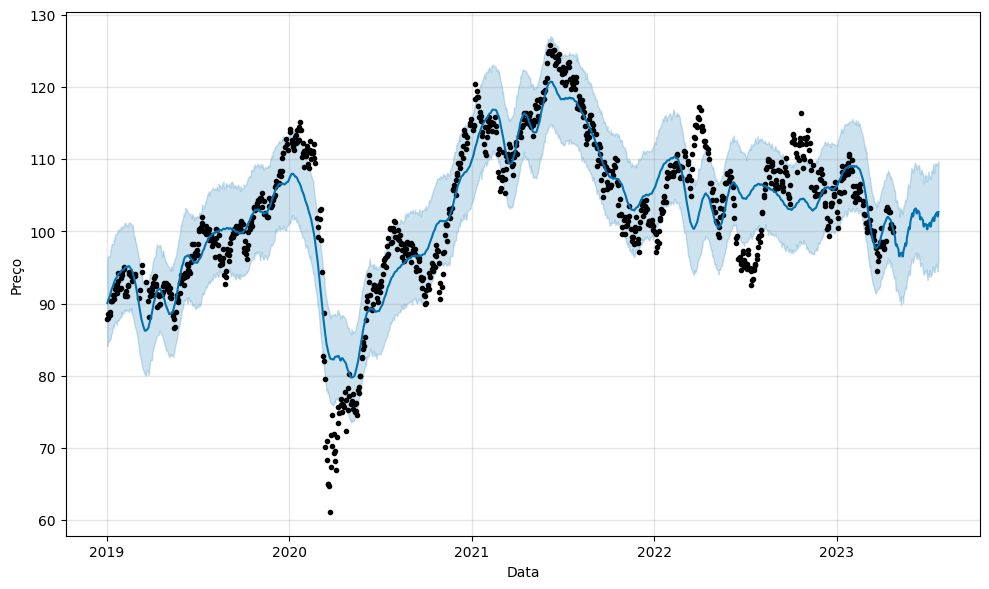

In [66]:
#Gráfico das previsões, valores reais dos preços em pretos
#A linha são as previsões do modelo
#o azul da ponta direita são as previsões
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

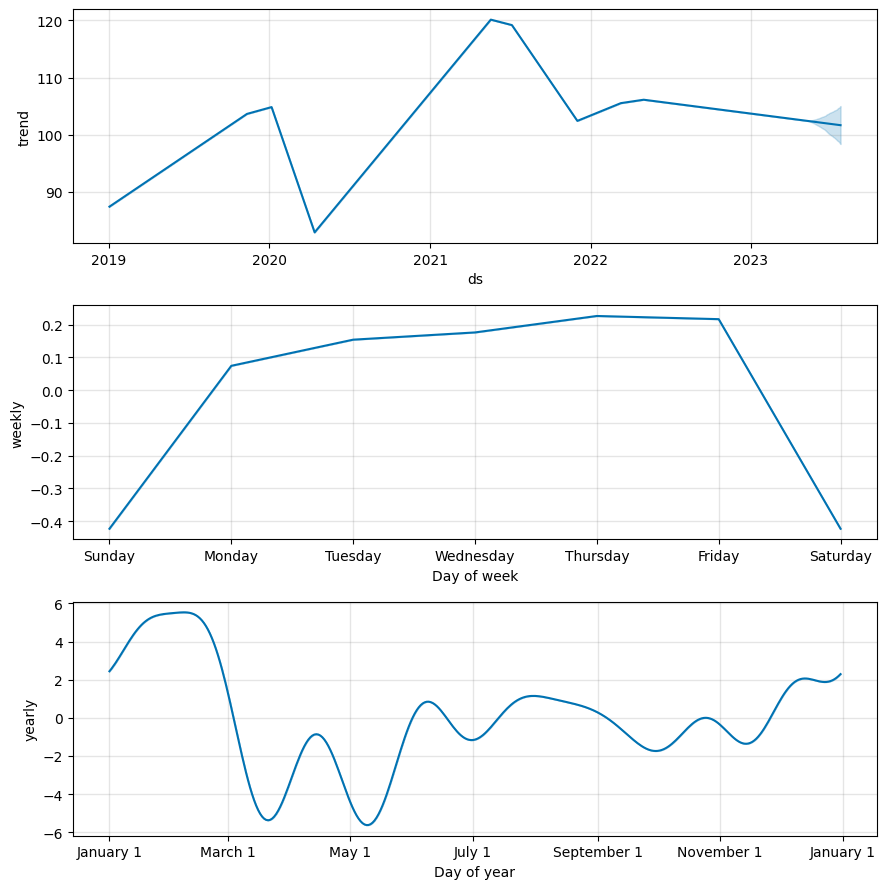

In [67]:
modelo.plot_components(previsoes);
#gráfico de tendência, semanal e anualmente

In [68]:
#igual ao gráfico acima, porém dinâmico de tendência, semanal e anualmente
from prophet.plot import plot_plotly, plot_components_plotly

In [69]:
plot_plotly(modelo, previsoes)

In [70]:
#gráfico dinâmico para os componentes
plot_components_plotly(modelo, previsoes)

## Avaliação do modelo prophet


In [71]:
teste.shape

(342,)

In [72]:
teste.tail()

Date
2023-04-18    102.699997
2023-04-19    100.480003
2023-04-20    101.000000
2023-04-24    100.620003
2023-04-25     99.919998
Name: BOVA11.SA, dtype: float64

In [73]:
#fazer a previsão da base de dados inteiras, logo não faço dos próximos 90 dias
pred = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(pred)

In [74]:
previsoes.shape

(1071, 19)

In [75]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1066,2023-04-18,102.622007,95.485755,107.814745,102.622007,102.622007,-0.925901,-0.925901,-0.925901,0.153857,0.153857,0.153857,-1.079758,-1.079758,-1.079758,0.0,0.0,0.0,101.696106
1067,2023-04-19,102.612059,95.400310,107.715388,102.612059,102.612059,-1.043373,-1.043373,-1.043373,0.175948,0.175948,0.175948,-1.219321,-1.219321,-1.219321,0.0,0.0,0.0,101.568686
1068,2023-04-20,102.602110,95.434241,107.519948,102.602110,102.602110,-1.163654,-1.163654,-1.163654,0.226180,0.226180,0.226180,-1.389834,-1.389834,-1.389834,0.0,0.0,0.0,101.438456
1069,2023-04-24,102.562317,94.150926,107.156054,102.562317,102.562317,-2.248646,-2.248646,-2.248646,0.074063,0.074063,0.074063,-2.322709,-2.322709,-2.322709,0.0,0.0,0.0,100.313671
1070,2023-04-25,102.552369,94.129509,106.579474,102.552369,102.552369,-2.446928,-2.446928,-2.446928,0.153857,0.153857,0.153857,-2.600785,-2.600785,-2.600785,0.0,0.0,0.0,100.105441


In [76]:
previsoes = previsoes['yhat'].tail(342)

In [77]:
previsoes

729     104.865250
730     104.888267
731     104.997543
732     105.039289
733     105.101496
           ...    
1066    101.696106
1067    101.568686
1068    101.438456
1069    100.313671
1070    100.105441
Name: yhat, Length: 342, dtype: float64

In [78]:
#função do sklearn, o erro é de 4,28
mean_absolute_error(teste, previsoes)

4.2821177022795744